In [1]:
from IPython.display import *
#HTML('<style> ' + open('../demo.css').read() + '</style>')

# Pie charts as an alternative to bar charts

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
from IPython.display import *
from importlib import reload
import item_distribution_utils as utils
# so that we reload modified `utils` every time we "Run All" the cells
utils = reload(utils)

## A. Audience
In this excercise, our audience is a everyone who knows what a content management system is. We want to show off the prevalence of WordPress

In [4]:
tbl_cms = utils.get_w3_cms_distribution()
tbl_cms.head()

,of_total,of_cms
what,,
1&1 IONOS MyWebsite,NaN,0.1
3dcart,NaN,0.1
Adobe Dreamweaver,0.3,0.5
Adobe Experience Manager,0.1,0.1
Adobe Muse,0.1,0.3


## B. Build

In [5]:
tbl_cms = tbl_cms.fillna(0)
tbl_cms

,of_total,of_cms
what,,
1&1 IONOS MyWebsite,0.0,0.1
3dcart,0.0,0.1
Adobe Dreamweaver,0.3,0.5
Adobe Experience Manager,0.1,0.1
Adobe Muse,0.1,0.3
Bigcommerce,0.2,0.4
Bitrix,1.0,1.7
Blogger,0.9,1.6
Business Catalyst,0.0,0.1


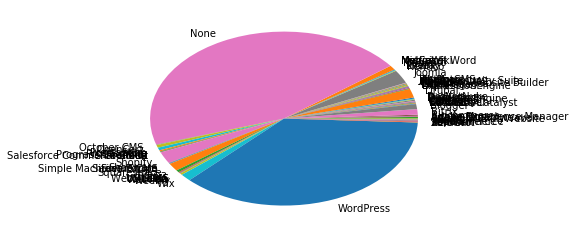

In [6]:
fig, ax = plt.subplots()
ax.pie(
    x=tbl_cms.of_total,
    labels=tbl_cms.index
)
None

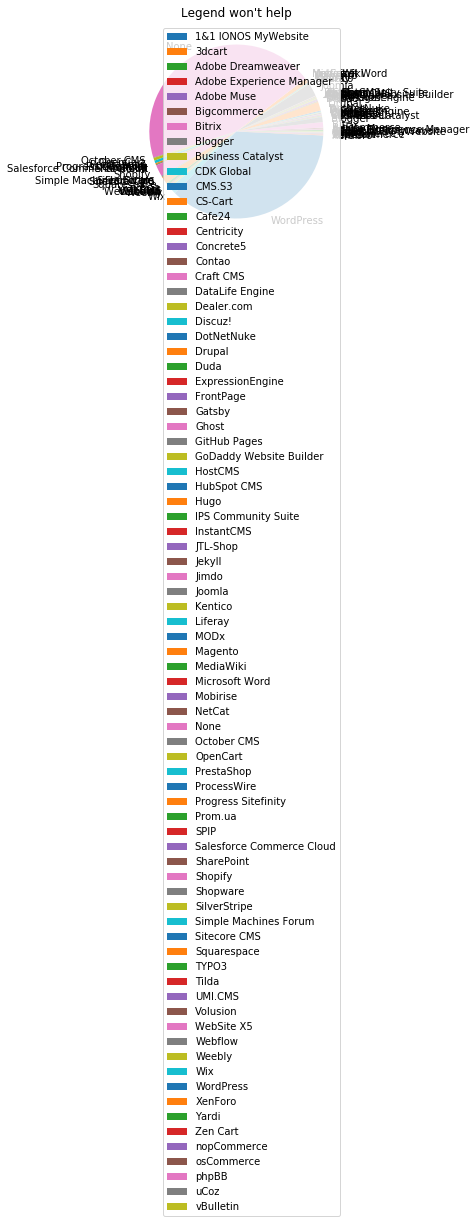

In [7]:
fig, ax = plt.subplots()
ax.set_aspect(1.0)  #!<----------------------------------
ax.pie(
    x=tbl_cms.of_total,
    labels=tbl_cms.index
)
ax.legend()
ax.set_title("Legend won't help")
None

The usual solution in this case would be to use a bar chart

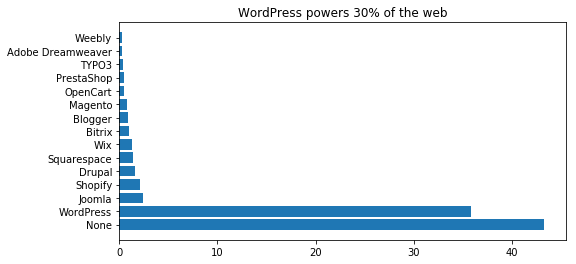

In [8]:
tbl_shortened = tbl_cms.sort_values('of_total', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(8, 4))
y = list(range(len(tbl_shortened)))
ax.barh(
    y,
    tbl_shortened.of_total,
)
ax.set_yticks(y)
labels = tbl_shortened.index
ax.set_yticklabels(labels, ha='right')
ax.set_title('WordPress powers 30% of the web')
None

## C. Conclusion
What does the graph mean? "What" vs. "So what"

Let's see what we can do with pie charts.

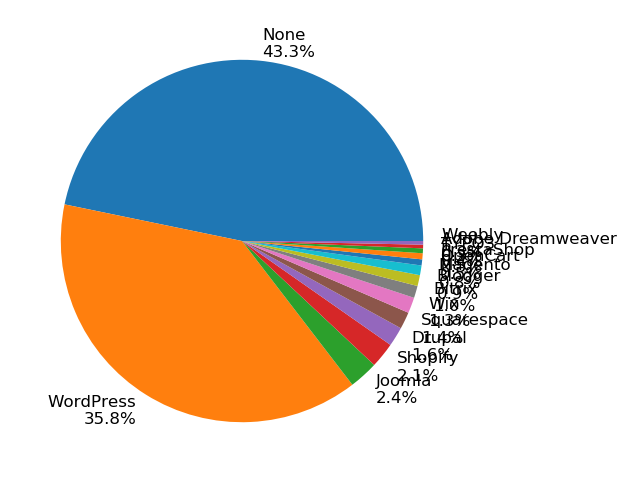

In [9]:
labels = [f'{row.name}\n{row.of_total:.1f}%' for _, row in tbl_shortened.iterrows()]
tbl_shortened['label'] = labels
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.pie(
    x=tbl_shortened['of_total'],
    labels=tbl_shortened['label']
)
ax.set_aspect(1.0)
None

There are still too many segments... Or are there?

In [10]:
tbl_cms.sort_values(
    'of_total', 
    ascending=False, 
    inplace=True
)

In [11]:
wordpress_blue = '#2f72a5'
grayish = sns.desaturate(wordpress_blue, 0.33)
palette = sns.light_palette(grayish, input="rgb", n_colors=len(tbl_cms), reverse=True)

In [12]:
tbl_cms['color'] = [
    'gray', 
    wordpress_blue
] + palette[2:]
tbl_cms['label'] = [
    {
        'None': 'No CMS', 
        'WordPress': 'WordPress'
    }.get(i, '')
        for i in tbl_cms.index
]
tbl_cms['order'] = [row.of_total if row.name != 'None' else -row.of_total for _, row in tbl_cms.iterrows()]
tbl_cms = tbl_cms.sort_values('order', ascending=False)
tbl_cms.head()

,of_total,of_cms,color,label,order
what,,,,,
WordPress,35.8,63.1,#2f72a5,WordPress,35.8
Joomla,2.4,4.3,"[0.353485867554569, 0.4383970055058649, 0.5030...",,2.4
Shopify,2.1,3.8,"[0.36056213466518683, 0.4445759004156601, 0.50...",,2.1
Drupal,1.6,2.8,"[0.3699971574793439, 0.4528144269620537, 0.515...",,1.6
Squarespace,1.4,2.5,"[0.37707342458996174, 0.45899332187184894, 0.5...",,1.4


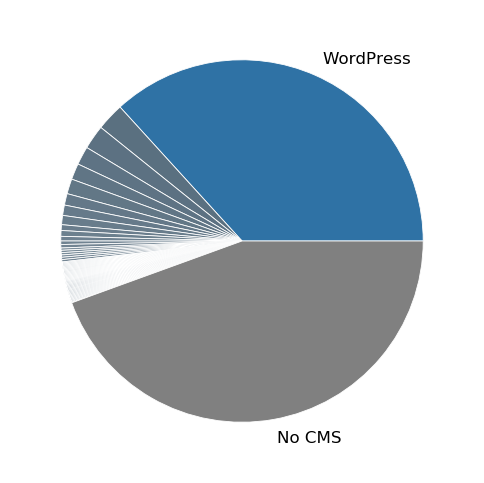

In [13]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_cms['of_total'],
    labels=tbl_cms['label'],
    colors=tbl_cms['color']
)
for p in patches:
    p.set_linewidth(0.5)
    p.set_edgecolor('white')
None

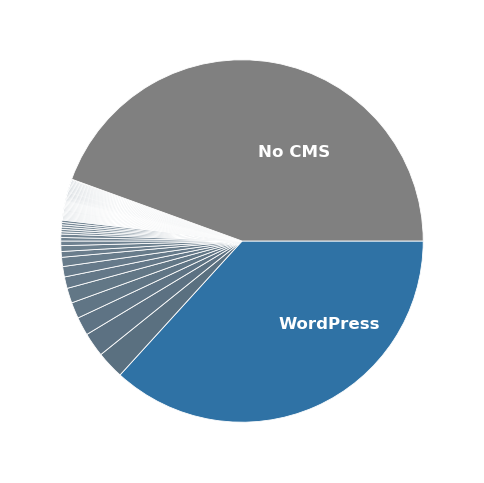

In [14]:
def my_pie(startangle=0, label=True, 
           labeldistance=0.5, counterclock=False
          ):
    fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
    ax.set_aspect(1.0)
    if label:
        labels = tbl_cms['label']
    else:
        labels = None
    patches, texts = ax.pie(
        x=tbl_cms['of_total'],
        labels=labels,
        colors=tbl_cms['color'],
        startangle=startangle,
        labeldistance=labeldistance,
        textprops=dict(color="w", weight='bold'),
        counterclock=counterclock
    )
    for p in patches:
        p.set_linewidth(0.5)
        p.set_edgecolor('white')
    return ax

my_pie()

In [15]:
import ipywidgets as ipw
ipw.interact(my_pie, startangle=(-180, 180), labeldistance=(0, 1.0))

interactive(children=(IntSlider(value=0, description='startangle', max=180, min=-180), Checkbox(value=True, de…

<function __main__.my_pie(startangle=0, label=True, labeldistance=0.5, counterclock=False)>

Text(0.5,1,'WordPress powers 30% of the Web')

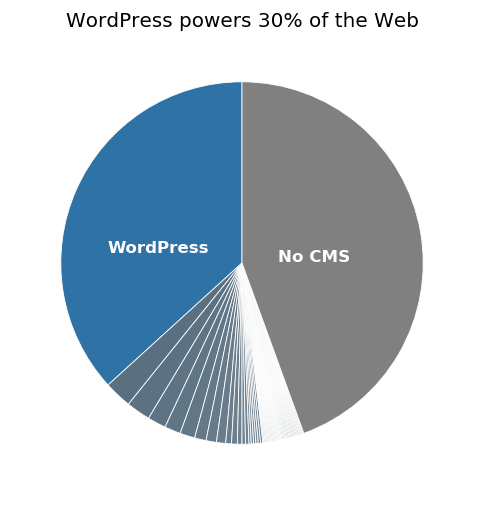

In [16]:
ax = my_pie(startangle=90, labeldistance=0.2, counterclock=True)
ax.set_title('WordPress powers 30% of the Web')

## D. Delete (data-ink ratio & readability)

Delete unneeded elements, improve the readabiilty

In [17]:
pass